In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline


In [8]:
from sklearn.datasets import fetch_california_housing
housing_data= fetch_california_housing()

In [9]:
print(housing_data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [10]:
print(housing_data["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [11]:
boston = pd.DataFrame(housing_data.data)
boston.columns = housing_data.feature_names
boston.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
boston['Price'] = housing_data.target
boston.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
boston.shape

(20640, 9)

In [14]:
boston.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [15]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [16]:
boston.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: >

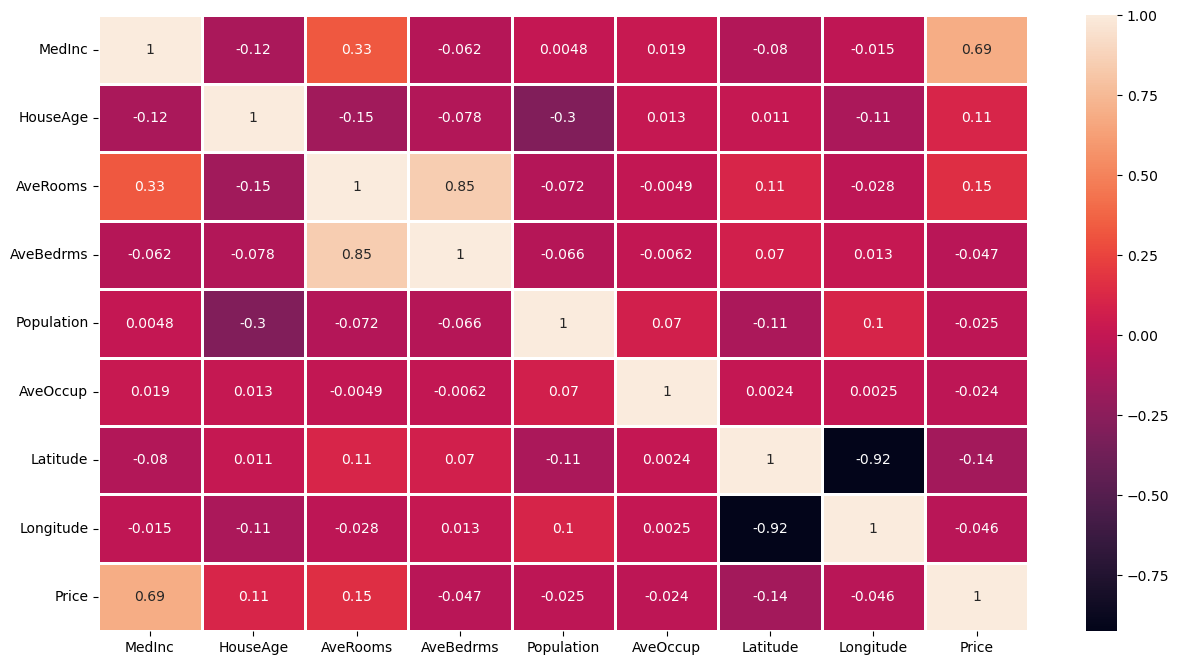

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(boston.corr() , annot=True , lw=1 )


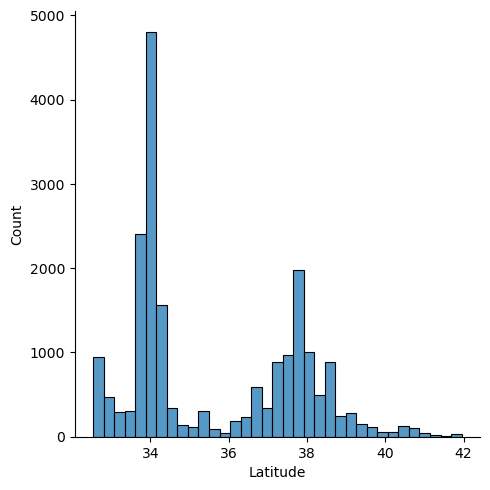

In [21]:
sns.displot(boston['Latitude'])

In [22]:
x = boston.drop('Price',axis=1)
y = boston['Price']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14448, 8)
(6192, 8)
(14448,)
(6192,)


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
print(lr.intercept_)

coeff_df=pd.DataFrame(lr.coef_,x.columns,columns=['Coeffficient'])
coeff_df

-37.00814031154553


,Coeffficient
MedInc,0.428819
HouseAge,0.009025
AveRooms,-0.095395
AveBedrms,0.579270
Population,-0.000007
AveOccup,-0.003828
Latitude,-0.425056
Longitude,-0.436635


In [33]:
predictions= lr.predict(x_test)

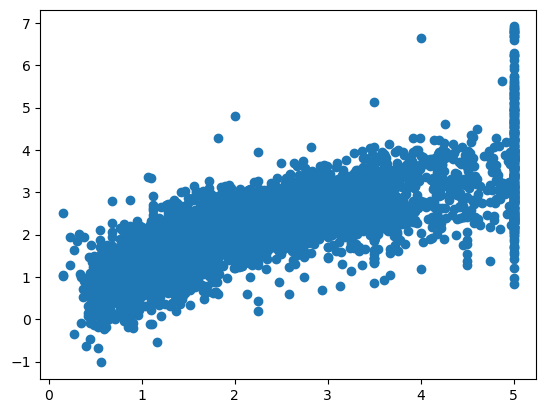

In [34]:
plt.scatter(y_test,predictions)

In [35]:
from sklearn import metrics

In [36]:
print('Mean_Absolute_Error : ' , metrics.mean_absolute_error(y_test,predictions))

Mean_Absolute_Error :  0.5298124731179862


In [37]:
print('Mean_Squared_Error : ' , metrics.mean_squared_error(y_test,predictions) )

Mean_Squared_Error :  0.5251893796369389


In [38]:
print('Root_Mean_Squared_Error : ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Root_Mean_Squared_Error :  0.7246995098914715


In [39]:
predictions

array([1.72416778, 2.88706346, 1.88708396, ..., 1.08271069, 1.49409677,
       1.75064235])